In [1]:
#%%writefile -a quadratic.py
import numpy as np
import matplotlib.pyplot as plt
class quadratic :
    def __init__(self, gamma):
        self.gamma = gamma
    def loss(self,X):
        return (X**2 * self.gamma).sum()
    def grad(self,X):
        return 2*X*self.gamma
    def hessian(self,X):
        return np.diag(2*self.gamma)
    def backtracking(self, X, DX, alpha, beta):
        t = 1
        while self.loss(X + t * DX) >= self.loss(X) + alpha * t * self.grad(X).T.dot(DX):
            t = beta * t
        return t
        
    
    def grad_descent(self, X0 ,n_iter = 300, beta = 0.1, alpha = 0.1, tol = 1e-5):
        X = X0
        X_store = []
        X_store.append(X0)
        loss = [self.loss(X)]
        #print(n_iter)
        for i in range(n_iter):
            #print(i)
            DX = -self.grad(X)
            t = self.backtracking(X, DX, alpha, beta)
            X = X+t * DX
            X_store.append(X)
            loss.append(self.loss(X))
            if self.loss(X) < tol:
                break
        return X_store, loss
    
    def newton_method(self,X0,n_iter = 300,alpha = 0.1, beta = 0.1, tol =1e-3):
        X = X0
        X_store = []
        X_store.append(X0)
        loss = [self.loss(X)]
        for i in range(n_iter):
            print(i)
            DX = -np.linalg.inv(self.hessian(X)).dot(self.grad(X))
            lamba2 = self.grad(X).T.dot(np.linalg.inv(self.hessian(X)).dot(self.grad(X)))
            if lamba2/2 <= tol:
                return X_store, loss
            ### line search 
            t = self.backtracking(X, DX, alpha, beta)
            X = X+t * DX
            X_store.append(X)
            loss.append(self.loss(X))
        return X_store, loss
            
                

Writing quadratic.py


In [2]:
#%%writefile -a main.py
gamma = np.array([30,150])
ell = quadratic(gamma)
x0 = np.array([40,40])
rs1,loss1 = ell.grad_descent(x0)
rs2, loss2 = ell.newton_method(x0)

##### import numpy as np
#gamma = np.array([4,1.5])
npts = 200
xlim = 70
ylim = xlim
x1 = np.linspace(-xlim, xlim, npts)
x2 = np.linspace(-ylim, ylim, npts)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.sqrt((np.array([X1.flatten(),X2.flatten()])
              .T**2*gamma)
         .sum(axis = 1))
         .reshape([npts,npts]))
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
ax.plot(np.sqrt(loss1), label = 'Gradient descent')
ax.plot(np.sqrt(loss2), label = 'Steepest descent')
plt.xlabel('# iteration')
plt.ylabel('loss')
ax.legend()

#cm = plt.cm.get_cmap('viridis')
#plt.scatter(X1, X2, c=Y, cmap=cm)
#plt.xlabel('X1')
#plt.ylabel('X2')
ax2 =  plt.subplot(122)
for i in range(len(rs1) - 1):
    ax2.annotate('', xy=rs1[i + 1], xytext=rs1[i],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
for i in range(len(rs2) - 1):
    ax2.annotate('', xy=rs2[i + 1], xytext=rs2[i],
                 arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 1},
                 va='center', ha='center')
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(["fsdf"])
#plt.legend('grad descent', 'steepest descent')
plt.show()

Writing main.py


0
1


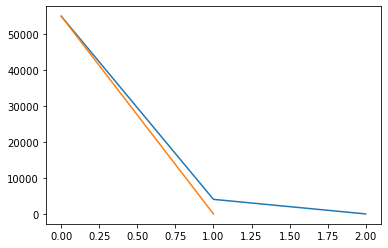

In [ ]:
gamma = np.array([0.5,5])
ell = quadratic(gamma)
x0 = np.array([100,-100])
rs1,loss1 = ell.grad_descent(x0)
rs2, loss2 = ell.newton_method(.x0)
plt.plot(loss1)
plt.plot(loss2)